In [49]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import re
import scipy.stats as stats

In [28]:
df = pd.read_csv('https://raw.githubusercontent.com/ryupepa/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


#### В этом задании мы с вами знакомимся с методом библиотекм seaborn, который называется lmplot()
#### Данный метод отличает то, что он позволяет обрабатывать категориальные переменные с помощью аргумента 'hue='.
#### Docstring:
'''When thinking about how to assign variables to different facets, a general
rule is that it makes sense to use ``hue`` for the most important
comparison, followed by ``col`` and ``row``. However, always think about
your particular dataset and the goals of the visualization you are
creating.'''

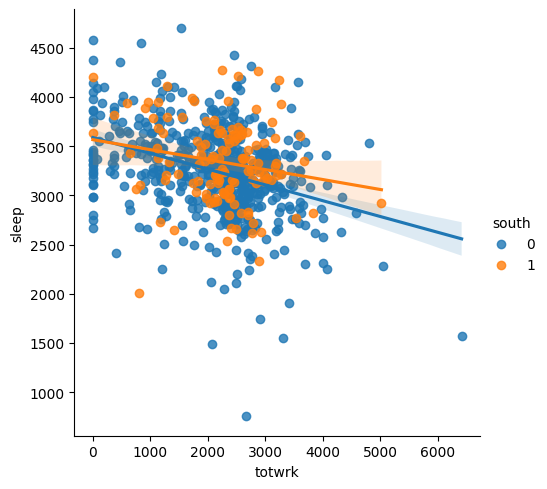

In [29]:
sns.lmplot(x='totwrk', y='sleep', hue='south', data=df);

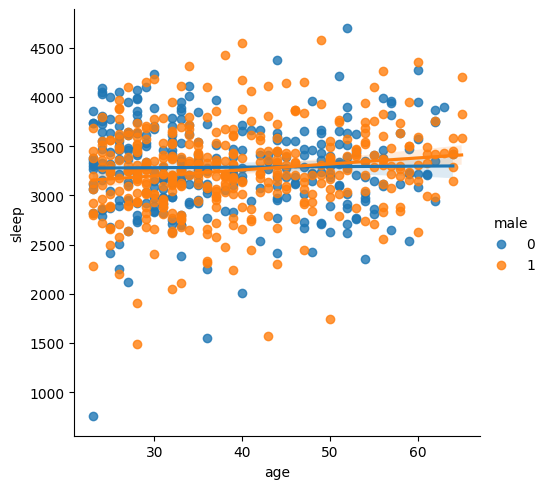

In [30]:
sns.lmplot(x="age", y="sleep", hue="male", data=df);

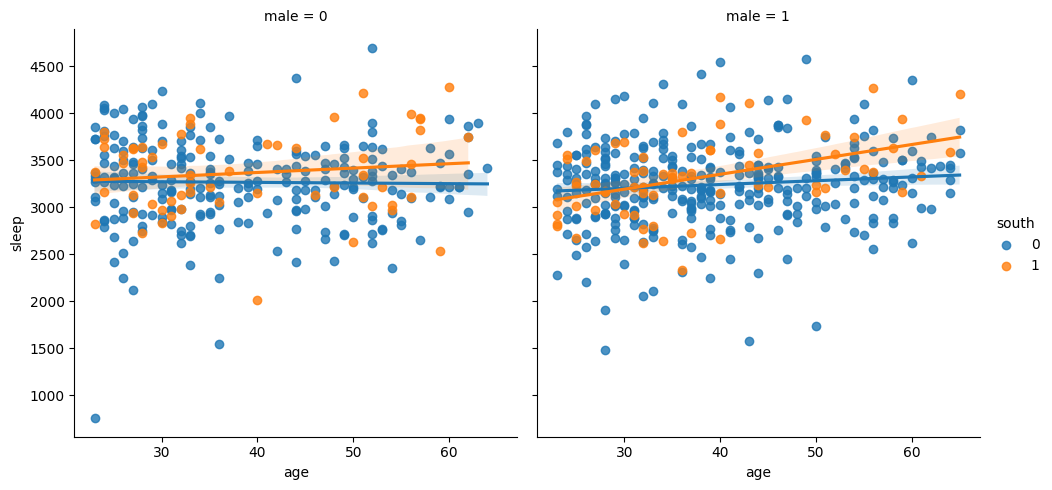

In [31]:
# Если необходимо для каждой категории данных построить отдельный график, можно воспользоваться аргументов col=''
# Получаем два графика, разделенные категорией 'male', на каждом из которых изображены категории данных 'south'
sns.lmplot(x="age", y="sleep", hue="south",col='male', data=df);

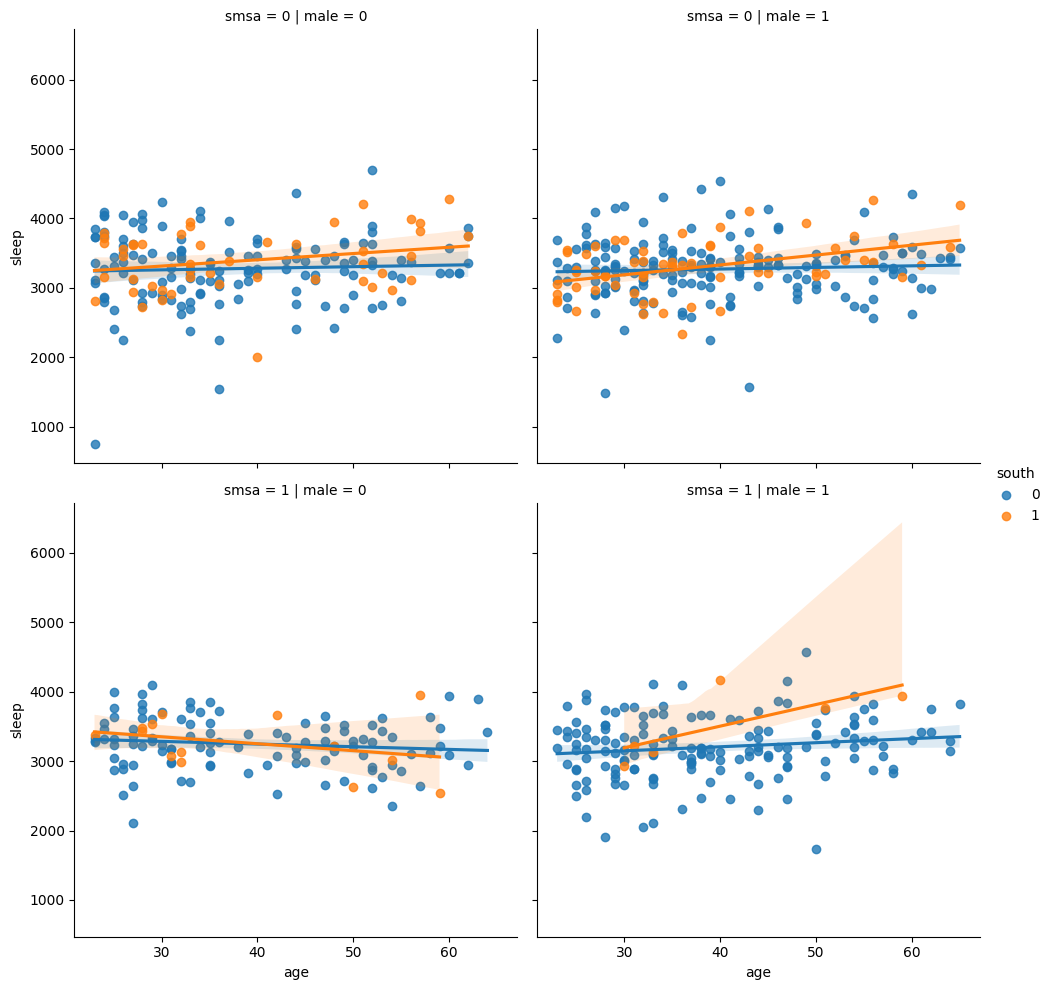

In [32]:
# Эти же данные можно изобразить на каждом отдельном графике с помощью метода row=''
# Например в каждой строке будет различное значение переменной 'smsa'
sns.lmplot(x="age", y="sleep",hue='south', row="smsa",col='male', data=df);

In [45]:
date_string = '''R2                      0.115          0.126  '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', date_string)) 

$$
F_{nabl} = \frac{R_{ur}^2 - R_{r}^2}{1-R_{un}^2}\cdot \frac{n-m}{q}.
$$
$$
F_{nabl} = \frac{RSS_{r}-RSS_{ur}}{RSS_{ur}}\cdot\frac{n-m}{q}.
$$

In [64]:
F_obs = (unrest - rest)/(1-unrest)*(706-8)/4
F_obs.round(2)

2.2

$$
F \sim_{H_0} F_{q,n-m}
$$
$F_{кр} = F(\alpha;q,n-m)$

In [65]:
alpha = 0.05 # Уровень значимости
#stats.f.ppf(alpha, q,df)
F_cr = stats.f.ppf(1-alpha,4,706-8)
F_cr

2.384692685857469

$F_{obs} < F_{cr}$ - данные согласуются с нулеовой гипотезой при заданном уровне значимости